# Aufgabe 25 - Regularisierte kleinste Quadrate

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags # to easily make a tridiagonal matrix
from scipy.stats import sem # standard error of mean

def readFromCsvFora(filename):
    '''This function reads data from a csv-file, assuming the first row are identifiers and there are two columns (x and y).'''
    x = []
    y = []
    with open(filename, 'rt') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[0])
            y.append(row[1])
        f.close()
    x = x[1:] # Wir wollen die oberste Zeile nicht, das sind nur Überschriften
    y = y[1:]
    # Aus x und y ordentliche numpy arrays machen
    x = np.asarray(x)
    y = np.asarray(y)
    # Die Strings in floats umwandeln
    x = x.astype(np.float)
    y = y.astype(np.float)
    return x, y


def readFromCsvForb(filename):
    '''This function reads data from a csv-file, assuming the first row are identifiers and there are 51 columns.
    Mean values of y are taken, a sigma (standard deviation of mean value) array is given back as well.'''
    x = []
    y = []
    with open('aufg_c.csv', 'rt') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[0])
            y.append(row[1:51])
    x = x[1:] # Erste Zeile brauchen wir nicht
    y = np.delete(y,(0), axis=0) # Bitte die erste Zeile löschen
    # Aus x und y ordentliche numpy arrays machen
    x = np.asarray(x)
    y = np.asarray(y)
    # Die Strings in floats umwandeln
    x = x.astype(np.float)
    y = y.astype(np.float)
    sigma = np.zeros(len(x))
    newy = np.zeros(len(x))
    for i in range(0,y.shape[0]):
        newy[i] = np.mean(y[i])
        sigma[i] = sem(y[i])
    return x, newy, sigma

def getMatrixA(x):
    f1 = np.ones(len(x))
    f2 = f1*x
    f3 = f2*x
    f4 = f3*x
    f5 = f4*x
    f6 = f5*x
    f7 = f6*x
    return np.vstack((f1,f2,f3,f4,f5,f6,f7)).T


def polynomial(x, a1, a2, a3, a4, a5, a6, a7):
    return a1+a2*x+a3*x**2+a4*x**3+a5*x**4+a6*x**5+a7*x**6

## Teilaufgabe a)

Die resultierenden Koeffizienten sind (von a1 bis a7, Konvention siehe die Funktionsdefinition oben)
[ -6.74453228e-02   6.09609032e-01  -5.13748208e-01   2.10566519e-01
  -4.52007747e-02   4.78568044e-03  -1.96288194e-04]


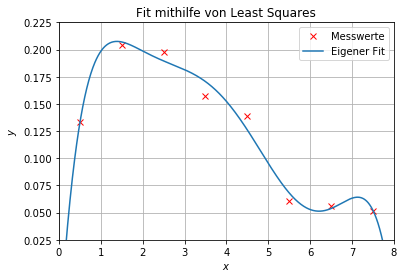

In [2]:
x, y = readFromCsvFora(filename = 'aufg_a.csv')
size = len(x) # amount of data points
A = getMatrixA(x)
a = np.dot(np.linalg.inv(A.T@A)@A.T, y)

print('Die resultierenden Koeffizienten sind (von a1 bis a7, Konvention siehe die Funktionsdefinition oben)')
print(a)
xlin = np.linspace(0,8,1000)
plt.plot(x, y, 'rx', label='Messwerte')
plt.plot(xlin, polynomial(xlin, *a), label='Eigener Fit')
plt.legend()
plt.grid()
plt.axis((0,8,0.025,0.225))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Fit mithilfe von Least Squares')
plt.show()
plt.clf()

## Teilaufgabe b)

Die resultierenden Koeffizienten sind (von a1 bis a7, Konvention siehe oben im Code),
wobei jede Zeile aufsteigend zu einem Lambda gehört
[[  5.27965878e-02   2.59531150e-01  -1.93231286e-01   7.69667250e-02
   -1.71628070e-02   1.90376484e-03  -8.10349701e-05]
 [  1.11464647e-01   1.07755243e-01  -6.42970519e-02   2.49315777e-02
   -6.33557738e-03   7.89265587e-04  -3.62702784e-05]
 [  1.42378398e-01   4.36794607e-02  -1.71856911e-02   6.46195658e-03
   -2.35843750e-03   3.58573783e-04  -1.81387872e-05]
 [  1.69656309e-01   7.96727954e-03  -1.06348501e-03  -1.07152880e-04
   -4.91755883e-04   1.07573168e-04  -6.00485672e-06]
 [  1.73753418e-01   2.10097391e-03  -2.09778443e-03  -1.88380412e-04
   -1.43934178e-04   3.94085783e-05  -2.28679067e-06]]


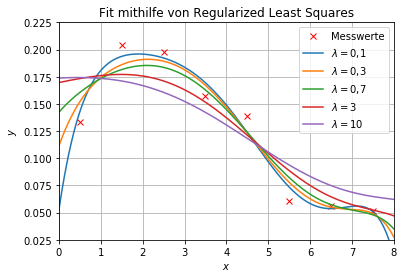

In [3]:
lambdaArray = np.array([0.1, 0.3, 0.7, 3, 10])
C = -2*np.ones(size)
C[0] = C[size-1] = -1
diagonals = [C, np.ones(size-1), np.ones(size-1)]
C = diags(diagonals, [0, 1, -1]).toarray()

Temp = C@A
a = []
for lam in lambdaArray:
    a.append(np.dot(np.linalg.inv(A.T@A+lam*Temp.T@Temp)@A.T, y))
a = np.asarray(a)
# Jetzt stehen in der ersten Zeile von a die Koeffizienten mit Regularisierung 0.1,
# in der zweiten Zeile mit Regularisierung 0.3 usw.
print('Die resultierenden Koeffizienten sind (von a1 bis a7, Konvention siehe oben im Code),')
print('wobei jede Zeile aufsteigend zu einem Lambda gehört')
print(a)

plt.plot(x, y, 'rx', label='Messwerte')
plt.plot(xlin, polynomial(xlin, *a[0]), label=r'$\lambda=0{,}1$')
plt.plot(xlin, polynomial(xlin, *a[1]), label=r'$\lambda=0{,}3$')
plt.plot(xlin, polynomial(xlin, *a[2]), label=r'$\lambda=0{,}7$')
plt.plot(xlin, polynomial(xlin, *a[3]), label=r'$\lambda=3$')
plt.plot(xlin, polynomial(xlin, *a[4]), label=r'$\lambda=10$')
plt.legend()
plt.grid()
plt.axis((0,8,0.025,0.225))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Fit mithilfe von Regularized Least Squares')
plt.show()
plt.clf()

## Teilaufgabe c)

Die resultierenden Koeffizienten sind (von a1 bis a7, Konvention siehe die Funktionsdefinition oben)
[  1.03975562e-01   1.92955244e-02   6.17000878e-02  -3.75650751e-02
   7.91884456e-03  -7.34894316e-04   2.56958584e-05]


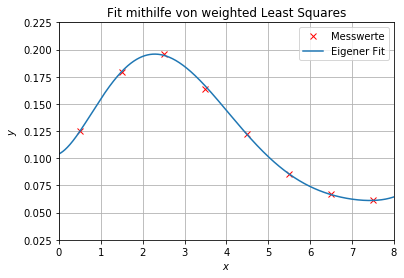

In [4]:
x, y, sigma = readFromCsvForb(filename = 'aufg_c.csv')
W = np.diag(1/sigma**2*np.ones(size)) # Mach eine Diagonale Matrix mit 1/sigma^2 auf der Hauptdiagonalen
a = np.dot(np.linalg.inv(A.T@W@A)@A.T@W, y)
print('Die resultierenden Koeffizienten sind (von a1 bis a7, Konvention siehe die Funktionsdefinition oben)')
print(a)

plt.plot(x, y, 'rx', label='Messwerte')
plt.plot(xlin, polynomial(xlin, *a), label='Eigener Fit')
plt.legend()
plt.grid()
plt.axis((0,8,0.025,0.225))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Fit mithilfe von weighted Least Squares')
plt.show()
plt.clf()